In [19]:
import pandas as pd
import glob

In [20]:
data_path = glob.glob("data/fact_checker_data*.csv")

In [21]:
data_path

['data/fact_checker_data_rigged-election_raw.csv',
 'data/fact_checker_data_mail-in_raw.csv',
 'data/fact_checker_data_election_raw.csv',
 'data/fact_checker_data_Hunter-Biden_raw.csv',
 'data/fact_checker_data_election-ballots_raw.csv']

In [22]:
data_list = []
for data in data_path:
    temp_df = pd.read_csv(data)
    temp_df["keyword"] = data[23:-8]
    data_list.append(temp_df)

In [26]:
data_combined = pd.concat(data_list)

data_combined.reset_index(drop=True, inplace=True)

data_combined = data_combined[data_combined.duplicated()==False].reset_index(drop=True)

In [34]:
data_combined = data_combined[pd.to_datetime(data_combined.date).dt.year!=2020]

In [35]:
data_combined.to_csv("data/fact_checker_data_raw.csv")

In [25]:
data_combined.sort_values(by="date")

,date,claim,truth_rating,url,source,fact,explanation,keyword
188,2020-12-15T00:00:00Z,An “audit report” found that a voting system u...,False,https://www.politifact.com/factchecks/2021/feb...,PolitiFact,NaN,NaN,election
255,2020-12-31T08:47:55Z,U.S. President-elect Joe Biden won millions mo...,False,https://www.snopes.com/fact-check/simple-math-...,Snopes,NaN,NaN,election
201,2021-01-02T00:00:00Z,"After a “major water main break,” Georgia elec...",Pants on Fire,https://www.politifact.com/factchecks/2021/jan...,PolitiFact,NaN,NaN,election
198,2021-01-02T00:00:00Z,“President-elect Biden steps down as president...,Pants on Fire,https://www.politifact.com/factchecks/2021/jan...,PolitiFact,NaN,NaN,election
200,2021-01-03T00:00:00Z,Photo shows “people coming from California to ...,False,https://www.politifact.com/factchecks/2021/jan...,PolitiFact,NaN,NaN,election
...,...,...,...,...,...,...,...,...
205,2022-10-05T00:00:00Z,The arrest of election software CEO Eugene Yu ...,Not Related to Votes,https://www.factcheck.org/2022/10/social-media...,FactCheck.org,NaN,NaN,election
46,2022-10-08T00:00:00Z,“President Trump and I lost an election in 202...,Pants on Fire,https://www.politifact.com/factchecks/2022/oct...,PolitiFact,NaN,NaN,mail-in
21,2022-10-08T00:00:00Z,“President Trump and I lost an election in 202...,Pants on Fire,https://www.politifact.com/factchecks/2022/oct...,PolitiFact,NaN,NaN,rigged-election
298,2022-10-08T00:00:00Z,“President Trump and I lost an election in 202...,Pants on Fire,https://www.politifact.com/factchecks/2022/oct...,PolitiFact,NaN,NaN,election-ballots


In [16]:
data_combined["truth_rating"] = data_combined["truth_rating"].replace("Mostly False", "False")
data_combined["truth_rating"] = data_combined["truth_rating"].replace("Mostly True", "True")
data_combined["truth_rating"] = data_combined["truth_rating"].replace("Half True", "True")
data_combined["truth_rating"] = pd.DataFrame(["Other" if (rating !="False") & (rating !="Pants on Fire") & (rating !="True") 
                                              else rating 
                                              for rating in data_combined.truth_rating])

In [17]:
data_agg = data_combined.groupby(["keyword","truth_rating"]).count()["date"].reset_index().rename(columns={"date":"count"})

In [18]:
data_agg

,keyword,truth_rating,count
0,Hunter-Biden,False,7
1,Hunter-Biden,Other,5
2,Hunter-Biden,Pants on Fire,7
3,Hunter-Biden,True,2
4,election,False,90
5,election,Other,45
6,election,Pants on Fire,39
7,election,True,16
8,election-ballots,False,34
9,election-ballots,Other,12


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

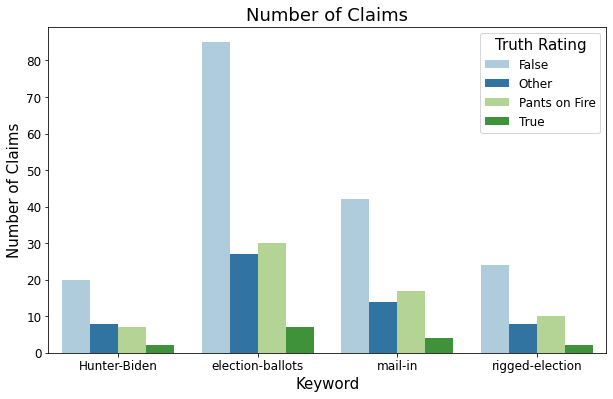

In [91]:
plt.figure(figsize=(10,6))
sns.set_palette(sns.color_palette("Paired"))
sns.barplot(x="keyword", y="count", hue="truth_rating", data=data_agg, ci=None)
plt.xlabel("Keyword", fontsize=15)
plt.ylabel("Number of Claims", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Truth Rating", title_fontsize=15, fontsize=12)
plt.title("Number of Claims", fontsize=18)
plt.savefig("Number_Claims.png", dpi=300)

In [ ]:

import matplotlib.pyplot as plt

# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# load dataset
tips = sns.load_dataset("tips")

# Set the figure size
plt.figure(figsize=(8, 8))

# grouped barplot
